# Practice Session 08: Connected components and k-core decomposition
<font size="+2" color="blue">Additional results: multiple experiments per graph</font>




# 1. The Star Wars graph

In [ ]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics

In [ ]:
INPUT_GRAPH_FILENAME = "starwars.graphml"

In [ ]:
# LEAVE AS-IS

# Read the graph in GraphML format
g_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_in.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()

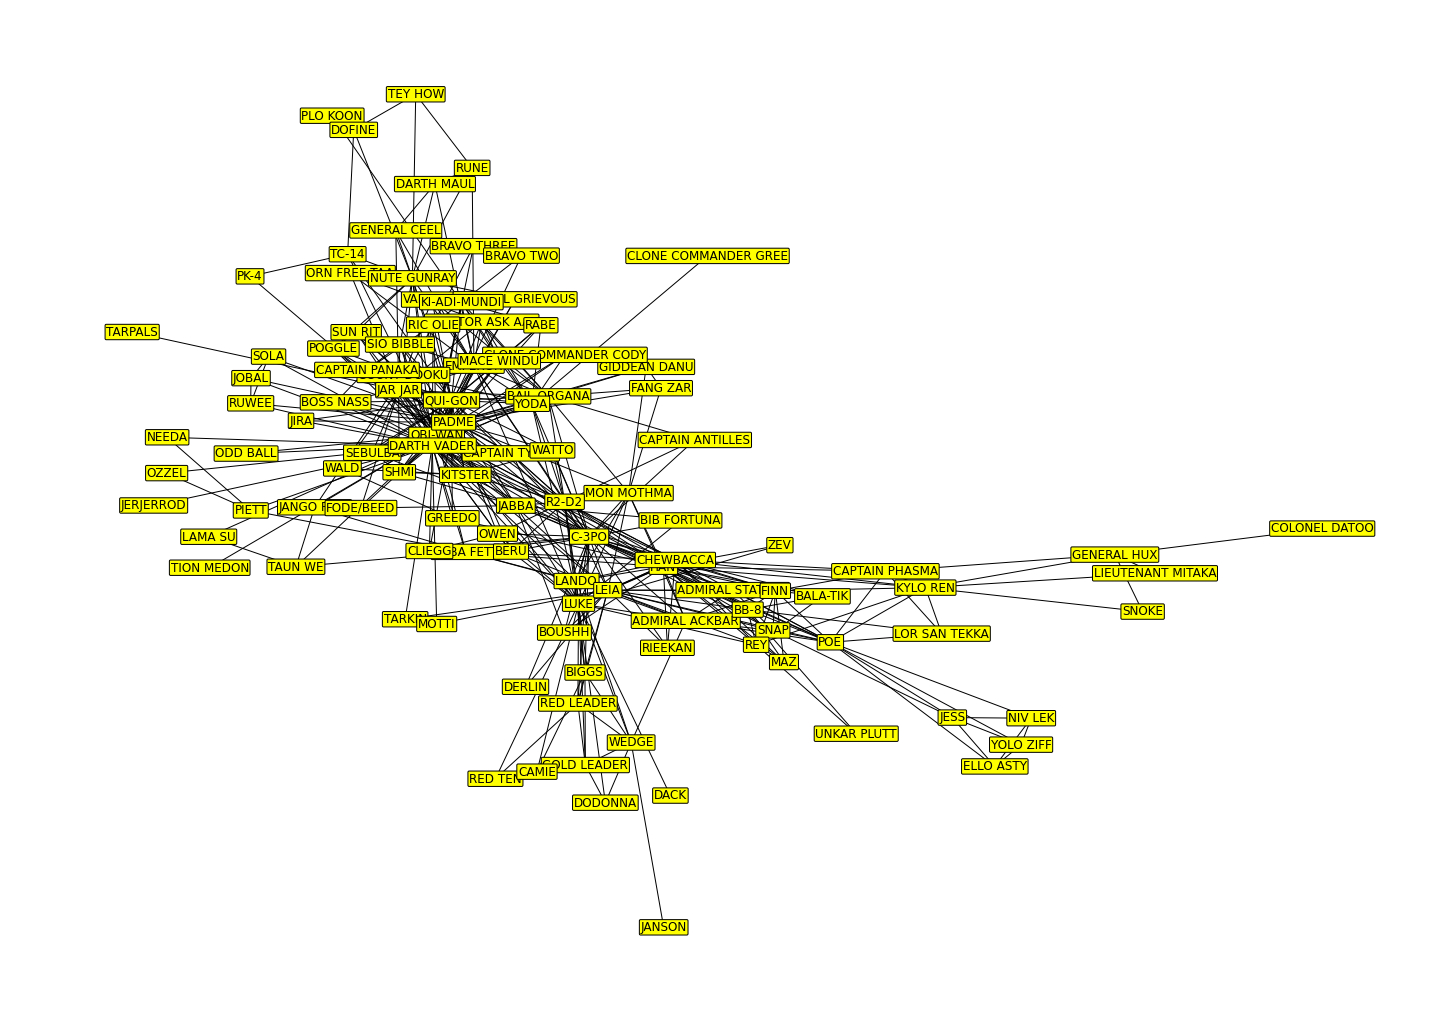

In [ ]:
# LEAVE AS-IS (OR MODIFY IF YOU WANT)

def plot_graph(g):

    # Create a plot of 20x14
    plt.figure(figsize=(20,14))

    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1, bbox=dict(facecolor="yellow", edgecolor='black', boxstyle='round,pad=0.1'))

    # Display
    plt.show()

plot_graph(g)

El grafo en cuestión es un grafo conectado, al menos lo que se muestra en la imagen ya que por cada par de nodos u,v pertenecientes al grafo, existe un camino entre sí y en la red solo hay un único componente conexo(CC) cuyo tamaño es N, siendo N el número de nodos totales del grafo.

In [ ]:
N = len(g.nodes())
node_degrees = [] # Lista con los grados de los nodos paa calcular las estadísticas

for node in g.nodes():
  node_degree = g.degree(node)
  node_degrees.append(node_degree) # Se añade el grado de cada nodo del grado

print(("Standard deviation: %.3f")%(statistics.stdev(node_degrees)))
print(("Max degree: %d")%(np.amax(node_degrees)))
print(("Avg degree: %.3f")%(statistics.mean(node_degrees)))
print(("Mode: %d")%(statistics.mode(node_degrees)))


Standard deviation: 8.682
Max degree: 52
Avg degree: 8.073
Mode: 4


In [ ]:
# Is this a scale-free network?
print("Proving if this is a scale-free network...")

# Random Network STD:

# Std = <k>^1/2 = Sqrt(<k>)


Std_RN = np.sqrt(statistics.mean(node_degrees))

print(("Standard Deviation if this is a Random network, Std = <k>^1/2 = Sqrt(<k>): %.3f")%(Std_RN))
print(("Statistics computed standard deviation: %.3f")%(statistics.stdev(node_degrees)))

# Scale free network STD:

# Std = Sqrt(Var)
# Var = <k^2> - <k>^2

# Se crea una nueva lista para calcular <k^2>
node_degrees2 = [] # Lista con los grados de los nodos paa calcular las estadísticas

for node in g.nodes():
  node_degree2 = pow(g.degree(node),2) # Se calcula el cuadrado del grado del nodo
  node_degrees2.append(node_degree2)

avg_degree2 = statistics.mean(node_degrees2) # Media de los grados al cuadrado <k^2>
degree2 = pow(statistics.mean(node_degrees),2) # Cuadrado de la media de los grados <k>^2
scale_free_variance = avg_degree2 - degree2 # La variancia en las redes scale-free es Var = <k^2> - <k>^2
Std_SF = pow(scale_free_variance,1/2) # Std es la raiz cuadrada de la variancia

print(("Avg (degree^2): %.3f")%(avg_degree2))
print(("Standard Deviation if this is a Scale Free network, Std = Sqrt(<k^2> - <k>^2): %.3f")%(Std_SF))
print(("Statistics computed standard deviation: %.3f")%(statistics.stdev(node_degrees)))

Proving if this is a scale-free network...
Standard Deviation if this is a Random network, Std = <k>^1/2 = Sqrt(<k>): 2.841
Statistics computed standard deviation: 8.682
Avg (degree^2): 139.855
Standard Deviation if this is a Scale Free network, Std = Sqrt(<k^2> - <k>^2): 8.642
Statistics computed standard deviation: 8.682


Como se puede ver a través de los cálculos anteriores, la red en cuestión se asemeja mucho más a una red libre de escalas que a una aleatoria ya que su desviación estandar es muy similar a la de las redes libres de escala, la desviación calculada mediante las estadísticas es de 8'682, en cambio la calculada mediante la fórmula de las redes libre de escala es de 8'642, una diferencia muy baja, más aún si tenemos en cuenta que la calculada mediante la desviación estandar de las redes aleatorias es de 2'841. Por tanto, podemos concluir con que la red en cuestión es una red libre de escalas, tanto por su distribución de nodos, que no es tan lineal como en una aleatoria, también por contener nodos de alto grado, y una desviación estándar y variancia altas y similares a las de las redes libres de escalas.

# 2. Remove a fraction of edges

In [ ]:
# LEAVE AS-IS

def remove_edges_uniformly_at_random(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError

    # Create a copy of the input graph
    g_out = g_in.copy()

    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:

        # Remove one random edge
        edge = random.choice(list(g_out.edges()))

        if g_out.has_edge(edge[0], edge[1]):
            g_out.remove_edge(edge[0], edge[1])

    # Return the resulting graph
    return g_out

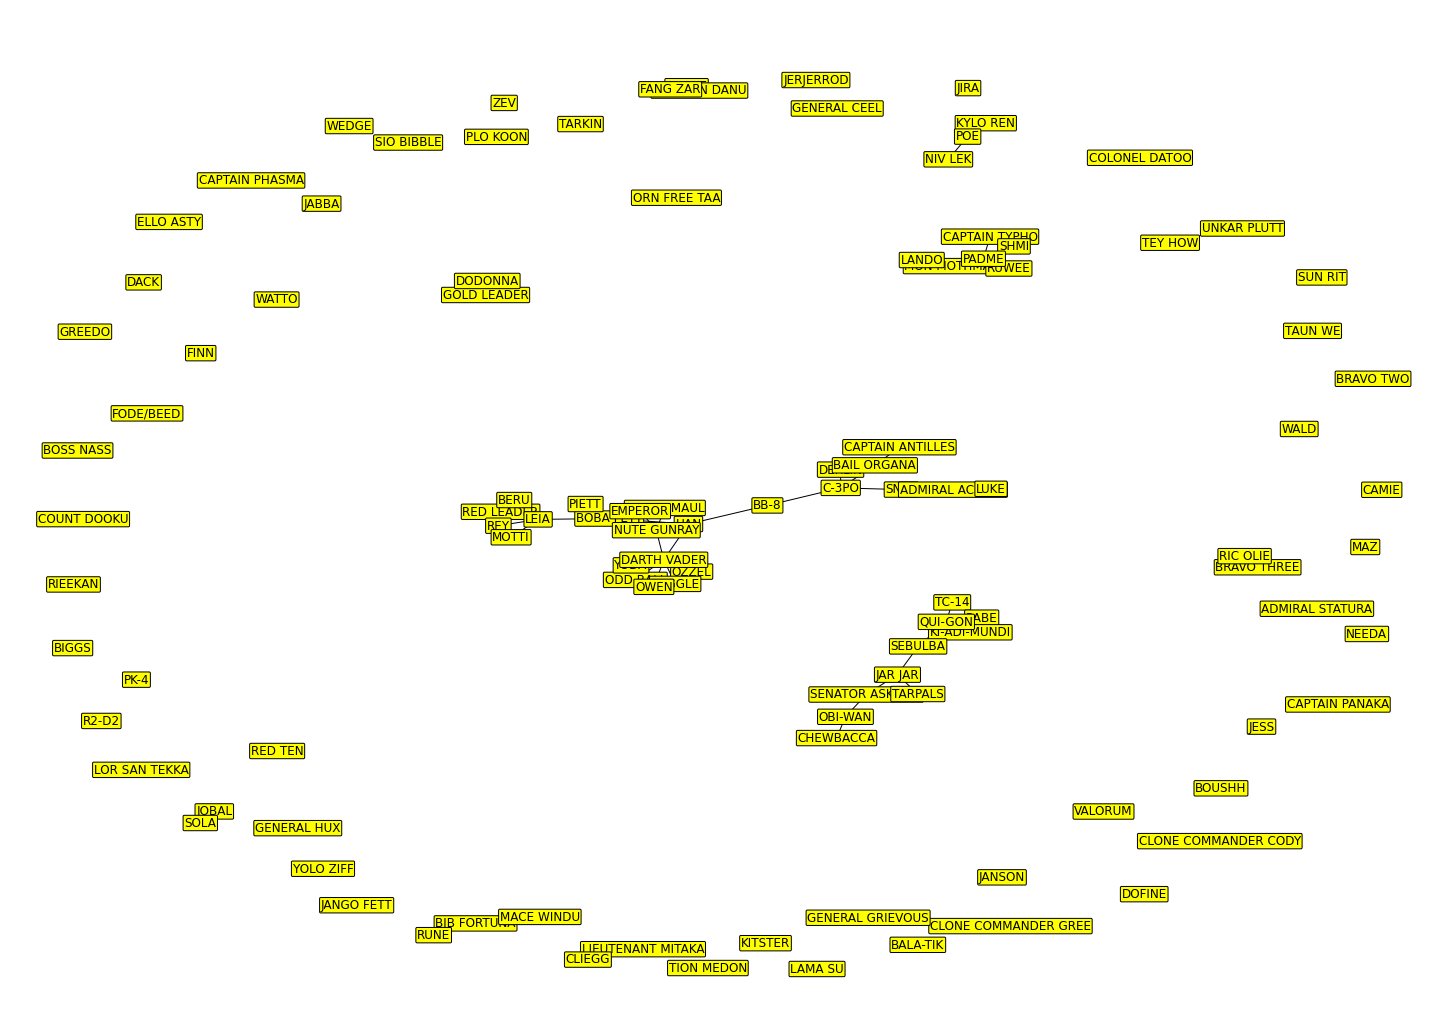

In [ ]:
g10 = remove_edges_uniformly_at_random(g, 0.9)
plot_graph(g10)

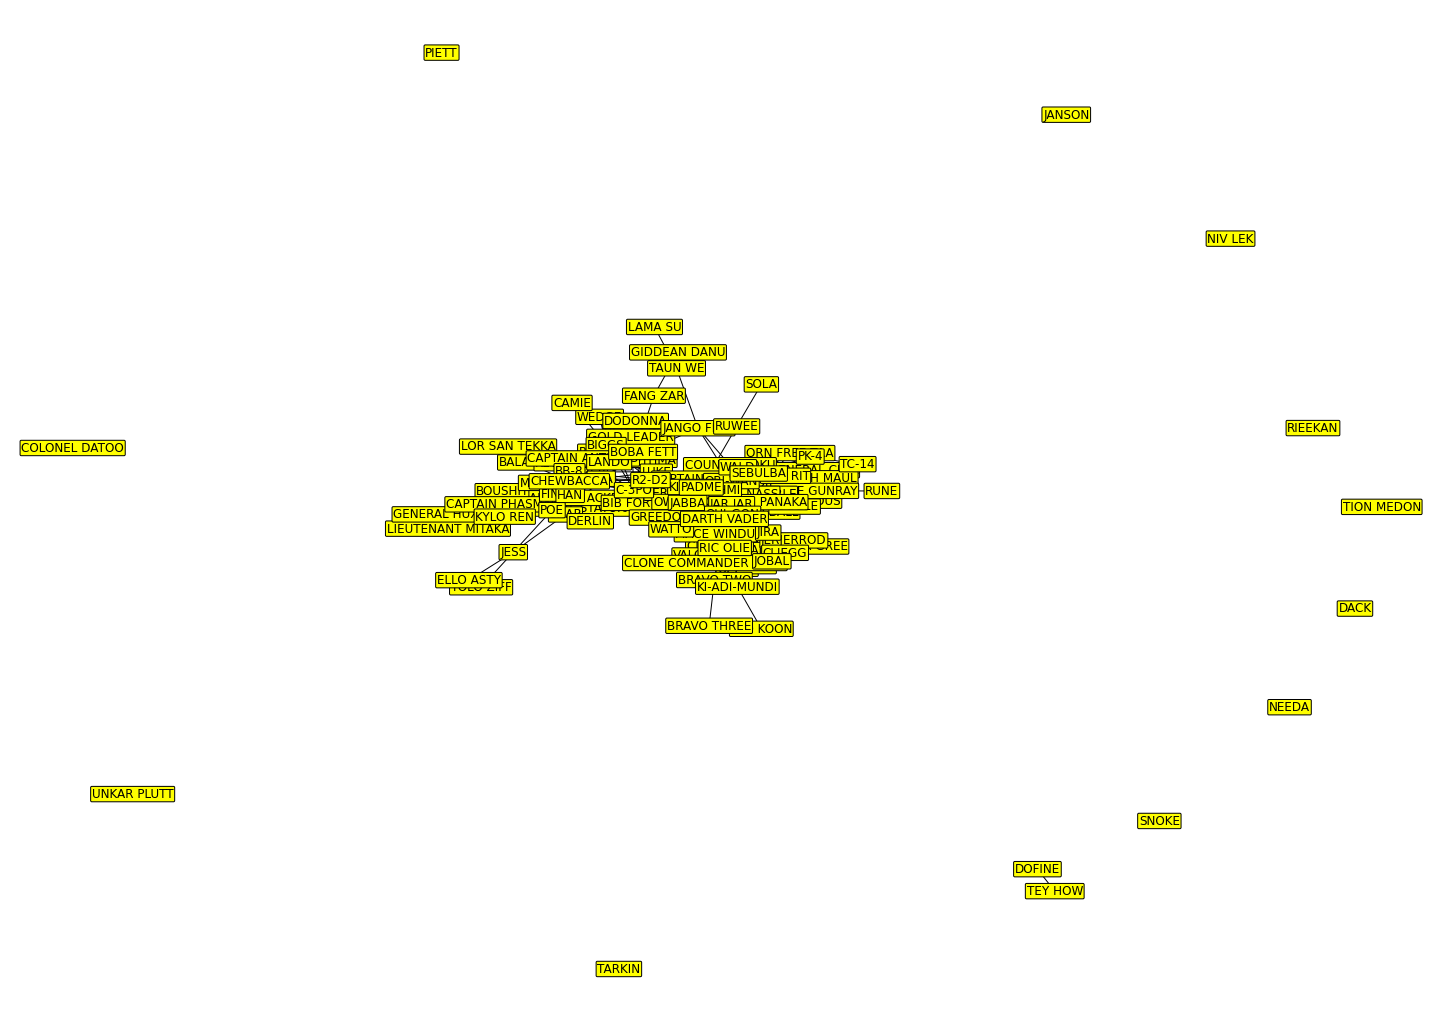

In [ ]:
g50 = remove_edges_uniformly_at_random(g, 0.5)
plot_graph(g50)

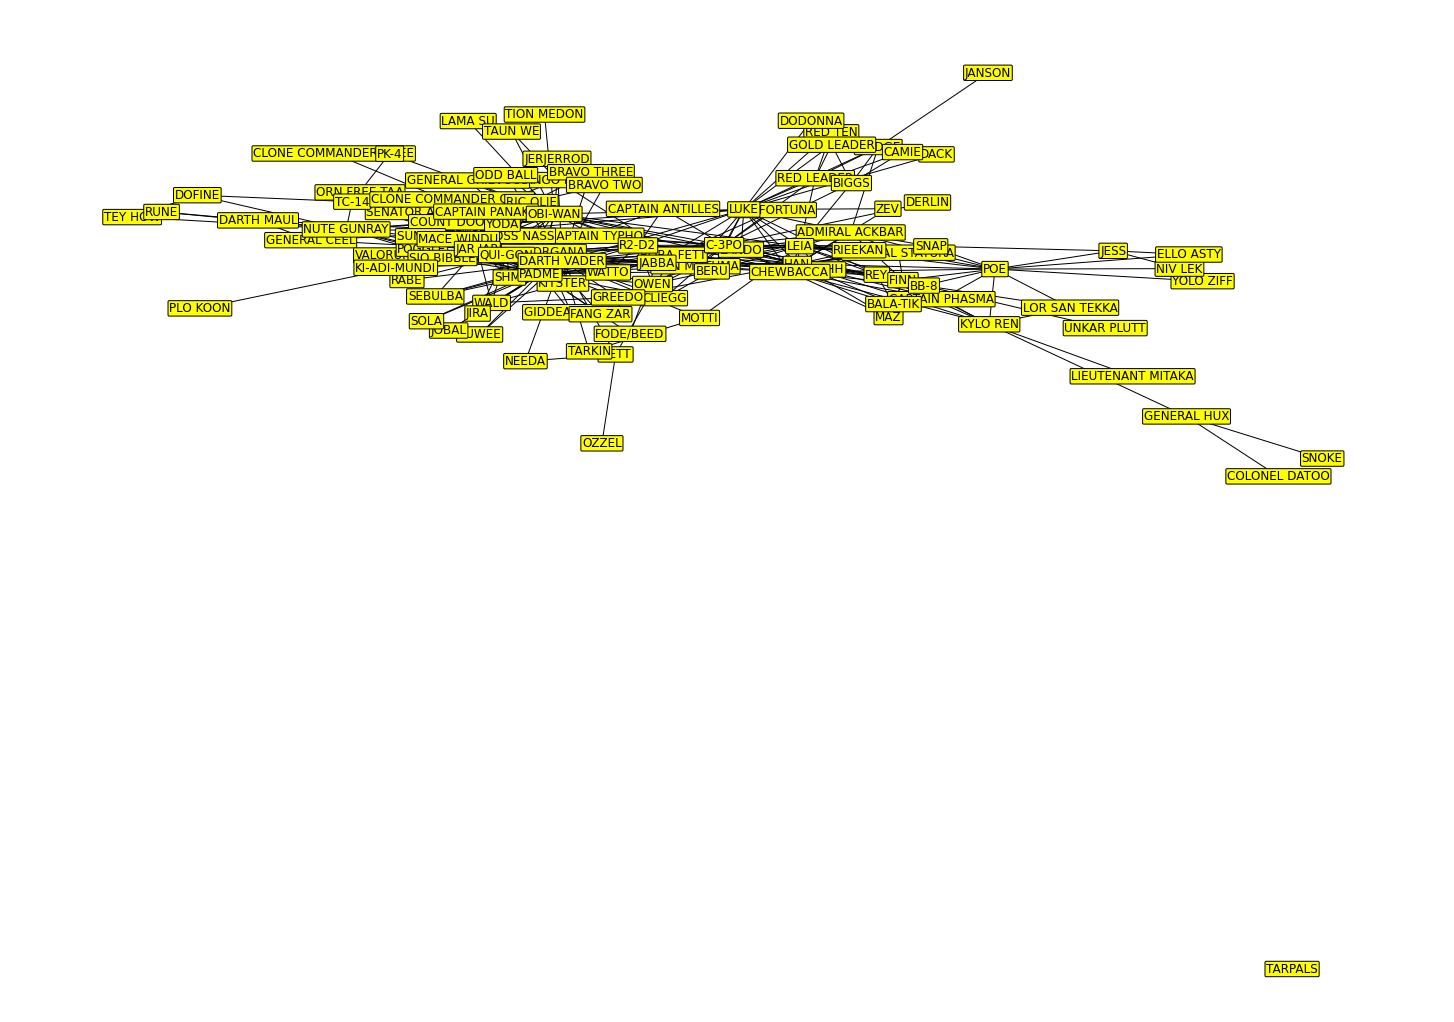

In [ ]:
g90 = remove_edges_uniformly_at_random(g, 0.1)
plot_graph(g90)

Se puede observar de primeras, que en el primer grafo, g10, en el que solo se conservan el 10% de los edges, hay un CC central con unos pocos nodos, aquellos con mayor grado, ya que son los que tienen que eliminar más edges para que se transformen en singletons, aparte de este CC, todo está rodeado de singletons sin ningún otro enlace y hay algún que otro CC menor con poco más de 3 enlaces, que son otros núcles de comenciones frecuentes. En el g50, se aprecia un CC central de un tamaño considerable pero con una densidad de enlaces bastante inferior al tercer grafo y aún menor al original. Además de este CC, hay unos cuantos singletons a su alrededor, que tienden a ser aquellos nodos con menor grado, actores cuya comención es muy baja. Por último en el tercer grafo, se muestra un único CC similar al del grafo original pero de menor densidad.

In [ ]:
# LEAVE AS-IS

def remove_edges_by_betweenness(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError

    # Create a copy of the input graph
    g_out = g_in.copy()

    # Compute edge betweenness
    edge_betweenness = nx.algorithms.centrality.edge_betweenness(g_out)
    edges_by_betweenness = sorted(edge_betweenness.items(), key=lambda x:x[1], reverse=True)

    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:

        to_remove = edges_by_betweenness.pop(0)
        edge_to_remove = to_remove[0]

        g_out.remove_edge(edge_to_remove[0], edge_to_remove[1])

    # Return the resulting graph
    return g_out

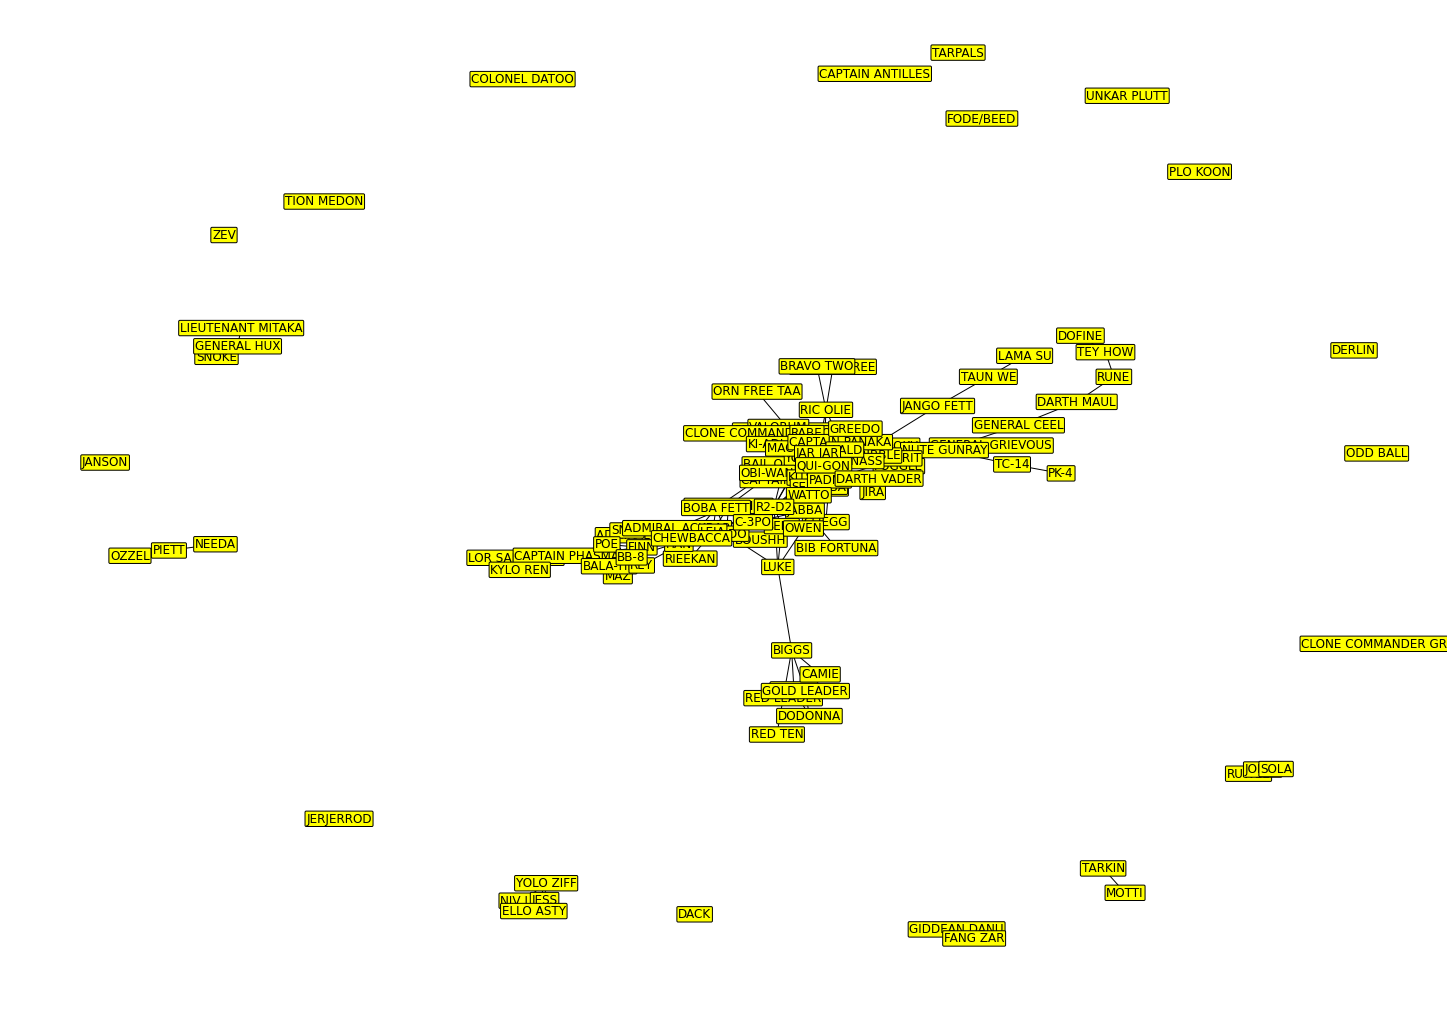

In [ ]:
# LEAVE AS-IS

g50b = remove_edges_by_betweenness(g, 0.50)
plot_graph(g50b)

En este caso, los edges en vez de eliminarse de manera aleatoria y uniforme, se eliminan aquellos cuyo betweenness es mayor, como resultado de esto, se forman largos caminos en vez de "hairballs" como suele pasar en algunos grafos, cuyo centro es el subgrafo más denso y que pasaba en el grafo original, esto se debe a que si se elimina los edges con mayor betweenness, lo que sucede es que el camino más corto entre dos nodos se transforma en otro, de esta manera, con la repetición, solo acaban quedando los de menor betweenness y se forman largas líneas de nodos consecutivos. Y, a diferencia del algoritmo de eliminación aleatoria, que puede comportar resultados distintos, aquí, como la betwenness no varía siempre eliminará primero los nodos de mayor betweenness.

# 3. Number of connected components

In [ ]:
def assign_component_recursive(g, node2componentid, starting_node, componentid):
  node2componentid[starting_node] = componentid # Se le asigna el id al nodo inicial
  for neighbor in g.neighbors(starting_node): # Se le asigna el id todos sus vecinos
    if neighbor not in node2componentid:
      assign_component_recursive(g, node2componentid, neighbor, componentid) # Se itera recursivamente hata que no hayan más vecinos.

In [ ]:

def assign_component(g):
  node2componentid = {} # Crea el diccionario
  componentid = 0 # Se inicializa el id a 0, para que a partir del primer nodo ya sea 1
  for node in g.nodes(): # Se itera por todos los nodos

    if node not in node2componentid: # Si el nodo no está en el diccionario quiere decir que no forma parte de ningún CC
      componentid += 1 # Por cada vez que entra un nodo, se aumenta el id de los CC en 1
      assign_component_recursive(g, node2componentid, node, componentid) # Asigna a todos los nodos de un mismo CC el mismo id

  return node2componentid


In [ ]:
# LEAVE AS-IS

def count_connected_components(g):
    # Call the function to assign each node to a connected component
    node2componentid = assign_component(g)

    # Count the number of distinct values in this assignment
    return len(set(node2componentid.values()))



In [ ]:
# LEAVE AS-IS

def generate_graphs_by_removing_edges(graph, method):
    ncomponents_after_reducing = {}
    for p in np.arange(0.0, 1.02, 0.02):
        print("- {:.0f}% of the nodes".format(p*100))
        reduced_graph = method(graph, p)
        ncomponents_after_reducing[p] = count_connected_components(reduced_graph)
    return ncomponents_after_reducing

print("Generating graphs by removing edges uniformly at random")
components_removing_uniformly_at_random = generate_graphs_by_removing_edges(g, remove_edges_uniformly_at_random)

print("Generating graphs by removing edges by betweenness")
components_removing_by_betweenness = generate_graphs_by_removing_edges(g, remove_edges_by_betweenness)

Generating graphs by removing edges uniformly at random
- 0% of the nodes
- 2% of the nodes
- 4% of the nodes
- 6% of the nodes
- 8% of the nodes
- 10% of the nodes
- 12% of the nodes
- 14% of the nodes
- 16% of the nodes
- 18% of the nodes
- 20% of the nodes
- 22% of the nodes
- 24% of the nodes
- 26% of the nodes
- 28% of the nodes
- 30% of the nodes
- 32% of the nodes
- 34% of the nodes
- 36% of the nodes
- 38% of the nodes
- 40% of the nodes
- 42% of the nodes
- 44% of the nodes
- 46% of the nodes
- 48% of the nodes
- 50% of the nodes
- 52% of the nodes
- 54% of the nodes
- 56% of the nodes
- 58% of the nodes
- 60% of the nodes
- 62% of the nodes
- 64% of the nodes
- 66% of the nodes
- 68% of the nodes
- 70% of the nodes
- 72% of the nodes
- 74% of the nodes
- 76% of the nodes
- 78% of the nodes
- 80% of the nodes
- 82% of the nodes
- 84% of the nodes
- 86% of the nodes
- 88% of the nodes
- 90% of the nodes
- 92% of the nodes
- 94% of the nodes
- 96% of the nodes
- 98% of the nodes

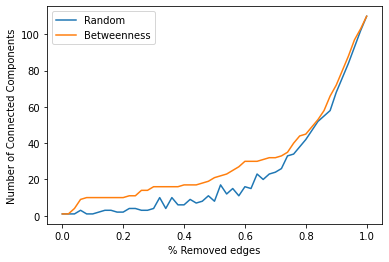

In [ ]:
x_vals = sorted(components_removing_uniformly_at_random.keys())
y_vals = [components_removing_uniformly_at_random[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Random")


x_vals = sorted(components_removing_by_betweenness.keys())
y_vals = [components_removing_by_betweenness[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Betweenness")

plt.legend()
plt.xlabel("% Removed edges")
plt.ylabel("Number of Connected Components")
plt.show()

Más que una tendencia lineal diria que se muestra una tendencia exponencial, que es algo que tiene mucho sentido si reparamos en los detalles de lo que estamos haciendo. Estamos quitando edges de un grafo que inicialmente era denso, es decir que tenía un grado promedio muy superior a 1, por ello, el grafo, al haber confirmado que es un grafo libre de escalas, se encuentra en régimen conectado, al principio, los enlaces que se eliminen, solo contribuirán a reducir su densidad, pero dificilmente, si son elegidos al azar dividirán el componente conexo, otra cosa distinta es por betweenness, que al eliminar los nodos con mayor betwwennes, no es raro que se eliminen enlaces que conectan distintas comunidades. Aún así, conforme se va acercando al punto crítico, cuando el grado promedio tiende a 1, en ambos métodos de eliminación, el número de componentes aumenta de manera acelerada, por que ahora sí que la mayoria de enlaces conectan nodos que de no estar serían singletons o CC separados.

# 4. Largest connected component

In [ ]:
def size_largest_connected_component(g):
  component_sizes = {} # Se inicializa el diccionario

  node2component = assign_component(g) # Se crea el diccionario de node2component, a cada nodo se le asigna un id

  for node in node2component: # Por cada nodo en el diccionario se itera
    component_id = node2component[node] # A que componente pertenece el nodo en cuestión

    if component_id in component_sizes: # Si el componente ya está en el diccionario, se aumenta el tamaño del componente en 1
      component_sizes[component_id] += 1

    else:
      component_sizes[component_id] = 1 # Si el componente aún no está en el diccionario, se estable tamaño de 1, ya que de momento solo hay un nodo con el componente.

  return np.max(list(component_sizes.values())) # Calcula el valor máximo del diccionario de componentes


In [ ]:

def largest_wcc_removing (g,method):
  d = {} # Diccionario donde se guardan los componentes
  for p in np.arange(0.0, 1.02, 0.02): # Iterar por distintos porcentajes
    reduced_graph = method(g, p) # Metodo por el cual se crea el grafo
    d[p] = size_largest_connected_component(reduced_graph) # Se calcula la longitud del componente más grande
  return d


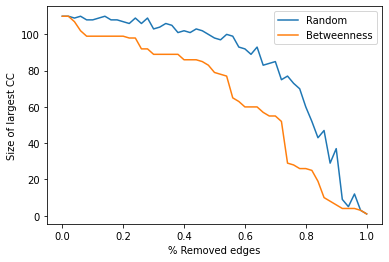

In [ ]:

largest_wcc_removing_uniformly_at_random = largest_wcc_removing (g,remove_edges_uniformly_at_random)
largest_wcc_removing_by_betweenness = largest_wcc_removing (g,remove_edges_by_betweenness)

x_vals = sorted(largest_wcc_removing_uniformly_at_random.keys())
y_vals = [largest_wcc_removing_uniformly_at_random[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Random")


x_vals = sorted(largest_wcc_removing_by_betweenness.keys())
y_vals = [largest_wcc_removing_by_betweenness[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Betweenness")

plt.legend()
plt.xlabel("% Removed edges")
plt.ylabel("Size of largest CC")
plt.show()

Este grafo tiene un total de 110 nodos por lo que reducir el CC al 90% supone dejarlo en 99 nodos, a partir de la gráfica, se puede ver como se deben quitar aleatoriamente, aproximadamente, entre un 40% y un 50% de los edges para llegar a este punto, mientras que tan solo se requiere de apenas un 10% si se quitan los de mayor betweenness, como ya he mencionado antes, esto tiene sentido debido a que al azar, se pueden quitar muchos enlaces que no desconecten nada ya que hay nodos de muy alto grado y no habrá cambio, por otro lado si se desconectan los de mayor betweenness, se quitaran los enlaces que conectan más nodos y rápidamente, se dividirán CC.

# 5. K-core decomposition

In [ ]:
# LEAVE AS-IS

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

In [ ]:
def kcore_decomposition(graph):
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(1, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            # Check if this list is empty
            if len(nodes_in_level) == 0:
                break # Romper ciclo, no hay ningún nodo dentro del nivel

            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level: # Itera por cada nodo que tenga el mismo grado
                node_to_level[node] = level
                g.remove_node(node) # Se borra el nodo en cuestión

    return(node_to_level)

In [ ]:
# LEAVE AS-IS

node_to_kcore = kcore_decomposition(g)

for character in ["JANSON", "RED TEN", "LUKE", "YODA"]:
    print("K-core of {:s}: {:d}".format(character, node_to_kcore[character]))

K-core of JANSON: 1
K-core of RED TEN: 2
K-core of LUKE: 7
K-core of YODA: 8


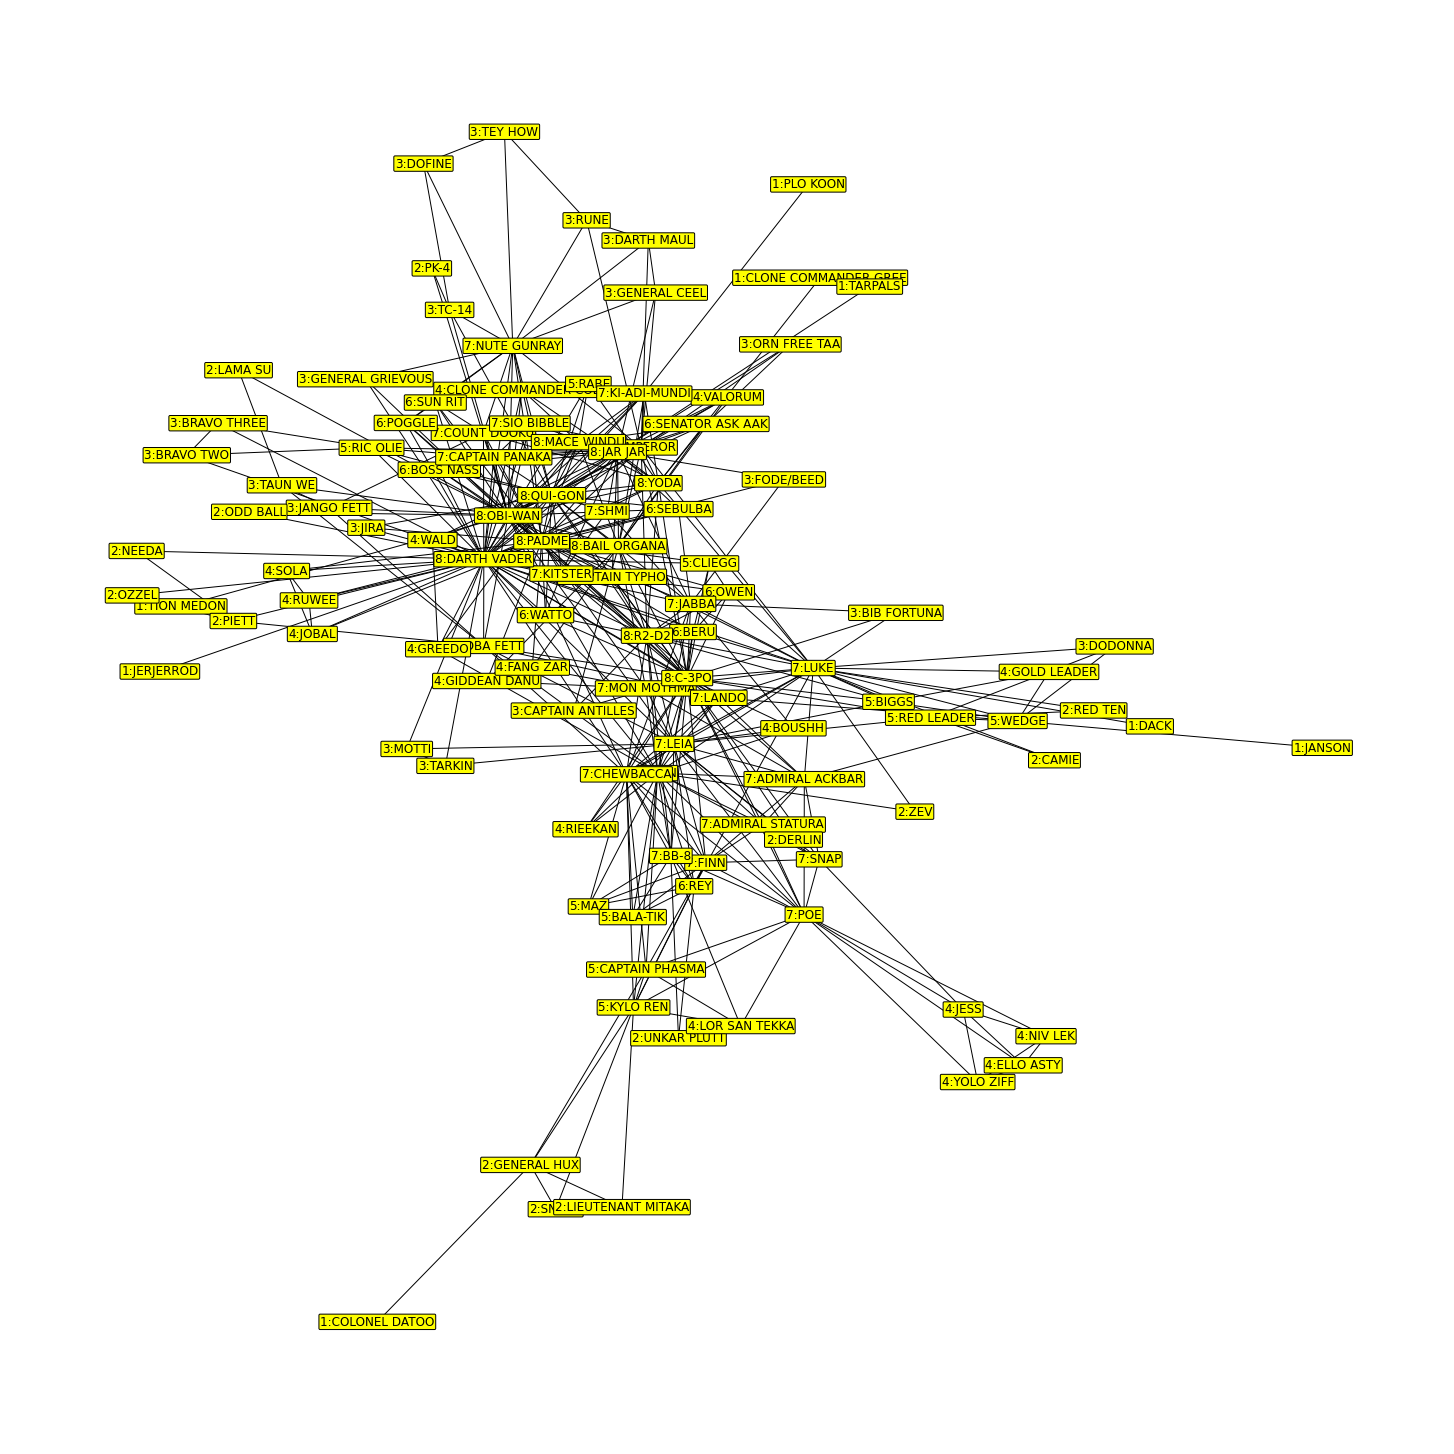

In [ ]:
# LEAVE AS-IS

# Compute k-core decomposition
node_to_kcore = kcore_decomposition(g)

# Rename nodes so they include the k-core
node_to_kcore_texts = dict([(name, str(node_to_kcore[name]) + ":" + name) for name in g.nodes()])
h = nx.relabel_nodes(g, node_to_kcore_texts)

# Draw the graph
plt.figure(figsize=(20,20))
nx.draw_spring(h, with_labels=True, node_size=1, bbox=dict(facecolor="yellow", edgecolor='black', boxstyle='round,pad=0.1'))
plt.show()

Si nos fijamos en el grafo dibujado, se puede apreciar como los nodos de mayor capa del k-core, tienden a coincidir con los nodos de mayor grado y a su vez estos son papeles de protagonistas, algo que tiene mucho sentido, ya que es más frecuente que se comencionen personajes que aparecen mucho, que no personajes secundarios o que no tienen mucha relevancia.

In [ ]:

def generate_graphs_by_removing_edges_ITERATIONS(graph, method):
    ITERATIONS = 100
    ncomponents_after_reducing = {}
    for i in range(ITERATIONS): # Número de iteraciones pedidas

      for p in np.arange(0.0, 1.02, 0.02):
          reduced_graph = method(graph, p)

          if p in ncomponents_after_reducing: # Si el porcentaje de edges eliminado ya ha sido añadido al diccionario
            ncomponents_after_reducing[p] += count_connected_components(reduced_graph)/ITERATIONS # Se suma el nuevo resultado normalizado entre el número de iteraciones

          else: # Si es la primera vez que se calcula ese porcentaje
            ncomponents_after_reducing[p] = count_connected_components(reduced_graph)/ITERATIONS

    return ncomponents_after_reducing

Generating graphs by removing edges uniformly at random
Generating graphs by removing edges by betweenness


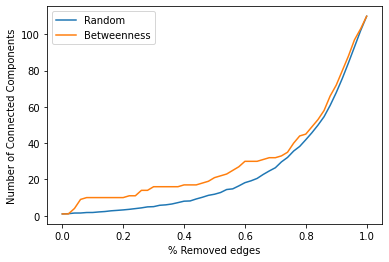

In [ ]:
print("Generating graphs by removing edges uniformly at random")
components_removing_uniformly_at_randomITERATIONS = generate_graphs_by_removing_edges_ITERATIONS(g, remove_edges_uniformly_at_random)

print("Generating graphs by removing edges by betweenness")
components_removing_by_betweennessITERATIONS = generate_graphs_by_removing_edges_ITERATIONS(g, remove_edges_by_betweenness)

x_vals = sorted(components_removing_uniformly_at_randomITERATIONS.keys())
y_vals = [components_removing_uniformly_at_randomITERATIONS[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Random")


x_vals = sorted(components_removing_by_betweennessITERATIONS.keys())
y_vals = [components_removing_by_betweennessITERATIONS[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Betweenness")

plt.legend()
plt.xlabel("% Removed edges")
plt.ylabel("Number of Connected Components")
plt.show()

In [ ]:
def largest_wcc_removing_ITERATIONS(g,method):
  ITERATIONS = 100
  largestCC_after_reducing = {}

  for i in range(ITERATIONS): # Número de iteraciones pedidas

    for p in np.arange(0.0, 1.02, 0.02): # Iterar por distintos porcentajes
      reduced_graph = method(g, p) # Metodo por el cual se crea el grafo

      if p in largestCC_after_reducing:
        largestCC_after_reducing[p] += size_largest_connected_component(reduced_graph)/ITERATIONS # Se divide entre el número de iteraciones, para la media

      else:
        largestCC_after_reducing[p] = size_largest_connected_component(reduced_graph)/ITERATIONS

  return largestCC_after_reducing

Generating graphs by removing edges uniformly at random
Generating graphs by removing edges by betweenness


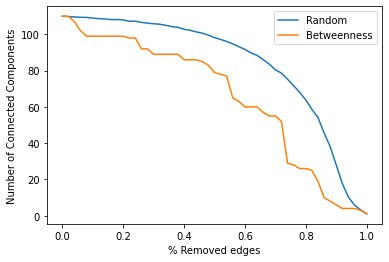

In [ ]:
print("Generating graphs by removing edges uniformly at random")
largest_removing_uniformly_at_randomITERATIONS = largest_wcc_removing_ITERATIONS(g, remove_edges_uniformly_at_random)

print("Generating graphs by removing edges by betweenness")
largest_removing_by_betweennessITERATIONS = largest_wcc_removing_ITERATIONS(g, remove_edges_by_betweenness)

x_vals = sorted(largest_removing_uniformly_at_randomITERATIONS.keys())
y_vals = [largest_removing_uniformly_at_randomITERATIONS[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Random")


x_vals = sorted(largest_removing_by_betweennessITERATIONS.keys())
y_vals = [largest_removing_by_betweennessITERATIONS[x] for x in x_vals]
plt.plot(x_vals, y_vals, label = "Betweenness")

plt.legend()
plt.xlabel("% Removed edges")
plt.ylabel("Number of Connected Components")
plt.show()

En ambos casos, aumentando las iteraciones se puede ver como la curva generada por eliminar nodos de manera aleatoria se suaviza drásticamente, y la razón de ser de esto es a causa de que al ser una probabilidad, conforme se aumentan el número de muestras tomadas, en este caso 100, de ser mayor aún se suavizaría más, cuando se aumentan de manera infinita, el resultado tiende a convergir en el valor de la probabilidad, y no suelen haber picos tan abruptos como se observaban con una sola iteración, ya que ahora tiende a la media de los 100 resultados, es decir la esperanza de la probabilidad. En cambio en ninguno de los casos varía el betweenness ni se suaviza, ya que por mucho que se repita la misma muestra, los valores del betweenness iniciales no cambiarán.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>